# The Spark Foundation- Data Science & Business Analytics Internship

# Name : Depavath Chandu Naik
# Batch : GRIPJANUARY22

# Task 1 : Prediction using Supervised Machine Learning

### Objective : Predict the percentage of an student based on the no. of study hours. 

### This is a linear regression task as it involves just 2 variables.

### What will be predicted score if a student studies for 9.25 hrs/ day?

# Importing all necessary libraries for this task

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Reading  the dataset to perform operation

In [33]:

marks_data= pd.read_csv('marks_data.csv')
marks_data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Data Analysis

In [34]:
#fetching top 5 records from the dataset
marks_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [35]:
#fetching last 5 records from the dataset
marks_data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [36]:
marks_data.shape

(25, 2)

In [37]:
marks_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [38]:
marks_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [39]:
marks_data.dtypes

Hours     float64
Scores      int64
dtype: object

In [40]:
marks_data.columns

Index(['Hours', 'Scores'], dtype='object')

In [41]:
#checking for null values
marks_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Data Visualization 

Text(0, 0.5, 'Scores')

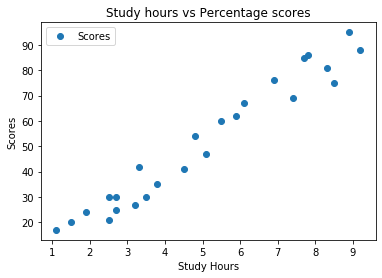

In [42]:
#plotting the distributin of hours and scores
marks_data.plot(x="Hours", y="Scores", style='o')
plt.title("Study hours vs Percentage scores")
plt.xlabel("Study Hours")
plt.ylabel("Scores")

### From the above graph, there is a linear relationship between the hours studied and percentage of scores obtained with positive slope. Hence the percentage of scores increases if  studied hours increases.

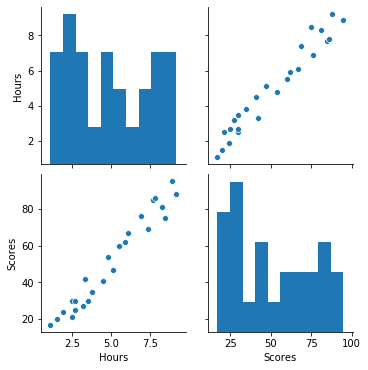

In [43]:
sns.pairplot(marks_data)

In [44]:
correlation=marks_data.corr()
correlation

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


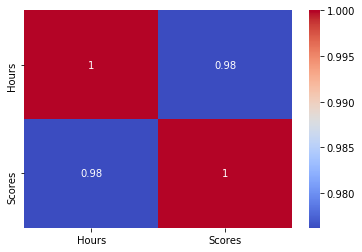

In [45]:
sns.heatmap(correlation, annot=True,cmap='coolwarm')

# Training a Linear Regression Model

### Let's now begin to train out regression model.We will need to first split up the marks_data into independent variable as X array that contains the features to train on and independent variabes as Y array with the target variable.

In [46]:
#Independent Variable 
X=marks_data.iloc[:,:-1].values
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [47]:
Y=marks_data.iloc[:,1:].values
Y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [48]:
print("X shape {}".format(X.shape))
print("Y shape {}".format(Y.shape))

X shape (25, 1)
Y shape (25, 1)


## Train Test Split


In [49]:
# Splitting the data into a training set and a testing set.
# We will train out model on the training set and then use the test set to evaluate the model.
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=33)


In [50]:
X_train

array([[5.9],
       [3.8],
       [8.3],
       [2.5],
       [4.8],
       [6.9],
       [2.5],
       [4.5],
       [5.1],
       [7.4],
       [3.3],
       [7.7],
       [1.1],
       [9.2],
       [8.5],
       [2.7],
       [6.1],
       [3.2],
       [5.5],
       [2.7]])

In [51]:
X_test

array([[7.8],
       [8.9],
       [1.9],
       [1.5],
       [3.5]])

## Creating and Training the Model

In [52]:
#Importing LinearRegression from sklearn.linear_model 
from sklearn.linear_model import LinearRegression

lrm=LinearRegression()

lrm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Model Evaluation 

In [53]:
#Printing the intercept
Intercept=lrm.intercept_
Intercept

array([3.41813943])

In [54]:
coeff_df = pd.DataFrame(lrm.coef_, columns=['Coefficient'])
coeff_df

,Coefficient
0,9.475292


## Predictions from our Model

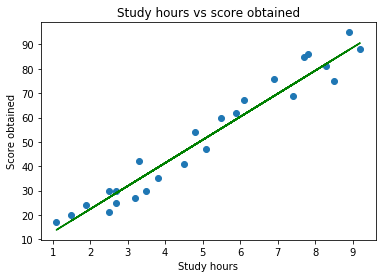

In [55]:
line=lrm.coef_*X+Intercept

plt.scatter(X, Y)
plt.xlabel("Study hours")
plt.ylabel("Score obtained")
plt.title("Study hours vs score obtained")
plt.plot(X, line,color="green");

# Predicted Scores

In [56]:
Y_pred = lrm.predict(X_test)
Y_pred

array([[77.32541818],
       [87.74823954],
       [21.42119451],
       [17.63107765],
       [36.58166195]])

# Actual Scores

In [57]:
Y_test

array([[86],
       [95],
       [24],
       [20],
       [30]], dtype=int64)

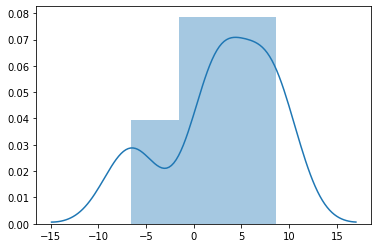

In [58]:
#Residual Histogram
sns.distplot(Y_test-Y_pred)

# Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [59]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test,Y_pred ))
print('MSE:', metrics.mean_squared_error(Y_test, Y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))


MAE: 5.491146412171139
MSE: 36.683340849223505
RMSE: 6.056677377013201


## Prediction of scores when student studies for 9.25 hours

In [60]:
hours=9.25
test=np.array([hours])
test=test.reshape(-1,1)
Predicted_Score=lrm.predict(test)
print("No of Hours     = {}".format(hours))
print("Predicted Score = {}".format(Predicted_Score[0]))

No of Hours     = 9.25
Predicted Score = [91.0645918]


# Conclusion

## Hence if a student is involved in study for 9.25 hours a day , then there is a possibility that the percentage would comes out to be 91.0645918.


# Thanks to The Sparks Foundation for the opportunity